### Regression models for Supervised Learnings

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

import operator

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

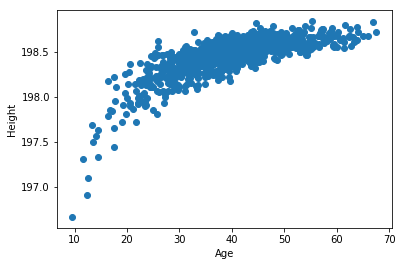

In [24]:
np.random.seed(0)

age = np.random.normal(40.0, 10.0, 1000)
height = 200 - (age + np.random.normal(20, 4, 1000)) / age

plt.scatter(age,height)
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

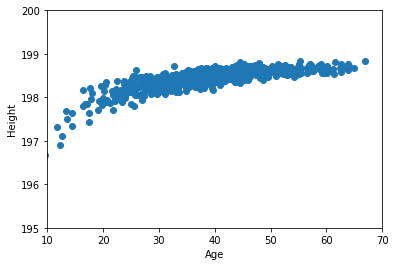

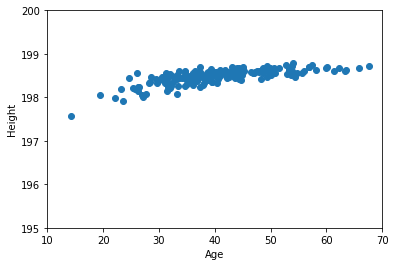

In [33]:
# split data for training the model
# normally data should be splitted randomly, but not important it is already randomly generated
trainX = age[:800]
testX = age[800:]
trainY = height[:800]
testY = height[800:]

# first 800 data points
axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(trainX, trainY)
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# last 200 data points
axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(testX, testY)
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

### Create 5th degree polynom and apply it

In [26]:
x = np.array(trainX)
y = np.array(trainY)

# 5th degree of polynom
poly = np.poly1d(np.polyfit(x, y, 5))

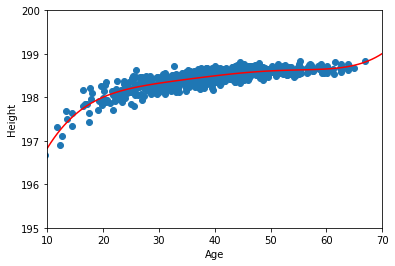

Mean squared error: 0.11
Variance score: 0.76


In [27]:
xp = np.linspace(10,70,100)

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(x, y)
plt.plot(xp, poly(xp), c='r')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y, poly(x))))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, poly(x)))

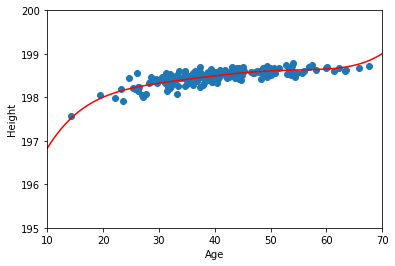

Mean squared error: 0.10
Variance score: 0.66


In [28]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(testx, testy)
plt.plot(xp, poly(xp), c='r')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(testy, poly(testx))))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(testy, poly(testx)))

### Apply LinearRegression model

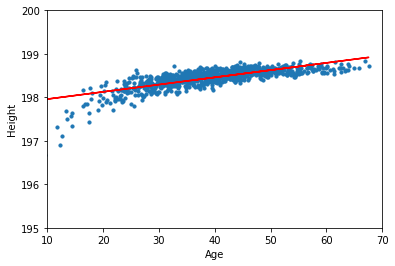

Mean squared error: 0.14
Variance score: 0.58


In [29]:
# data has single feauture then transform it to a singe sample
x = age.reshape(-1,1)
y = height.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

### Split data & apply LinearRegression model

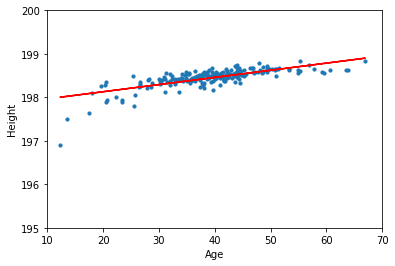

Mean squared error: 0.15
Variance score: 0.56


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred, color='r')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

### Apply PolynominalRegression model

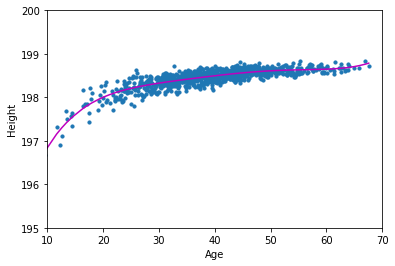

Mean squared error: 0.29
Variance score: -0.78


In [31]:
# data has single feauture then transform it to a singe sample
#x = age.reshape(-1,1)
#y = height.reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)
polynomial_features.fit(x, y)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

### Split data & apply PolynominalRegression model

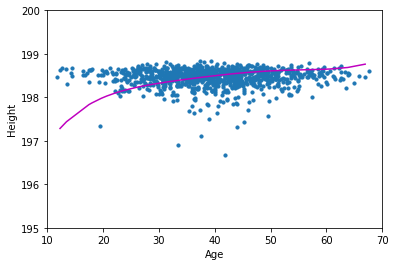

Mean squared error: 0.30
Variance score: -0.83


In [32]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x_train)
polynomial_features.fit(x_poly, y_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_pred = model.predict(polynomial_features.fit_transform(x_test))

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test, y_pred), key=sort_axis)
x_test, y_pred = zip(*sorted_zip)
plt.plot(x_test, y_pred, color='m')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))